In [4]:
filename_pathway = 'SNcVTA_WT.PANTHER_Pathways.txt'

fold_list = []
label_list = []
fdr_list = []

f_pathway = open(filename_pathway, 'r')
for line in f_pathway:
    if line.startswith('#'):
        continue
    tokens = line.strip().split("\t")
    if tokens[0].startswith('PANTHER'):
        continue
    tmp_name = tokens[0]
    tmp_fold = float(tokens[5])
    tmp_fdr = float(tokens[7])
    if tmp_fold > 2 and tmp_fdr < 0.005:
        print(tmp_name, tmp_fold, tmp_fdr)
        label_list.append(tmp_name)
        fold_list.append(tmp_fold)
        fdr_list.append(tmp_fdr)
f_pathway.close()

ATP synthesis (P02721) 17.16 0.00045
Ionotropic glutamate receptor pathway (P00037) 10.79 1.07e-12
Metabotropic glutamate receptor group I pathway (P00041) 10.57 1.92e-06
Axon guidance mediated by semaphorins (P00007) 10.45 6.49e-06
Metabotropic glutamate receptor group III pathway (P00039) 9.1 5.67e-13
Glycolysis (P00024) 8.65 5.45e-05
Synaptic vesicle trafficking (P05734) 8.58 2.13e-05
Huntington disease (P00029) 6.89 1.54e-18
Histamine H2 receptor mediated signaling pathway (P04386) 6.73 0.00146
Dopamine receptor mediated signaling pathway (P05912) 6.12 7.13e-06
GABA-B receptor II signaling (P05731) 6.01 0.000451
Cytoskeletal regulation by Rho GTPase (P00016) 5.71 3.21e-07
Enkephalin release (P05913) 5.65 0.00152
Metabotropic glutamate receptor group II pathway (P00040) 5.34 0.00044
Muscarinic acetylcholine receptor 1 and 3 signaling pathway (P00042) 4.81 0.000251
Heterotrimeric G-protein signaling pathway-Gq alpha and Go alpha mediated pathway (P00027) 4.53 3.77e-07
Integrin signal

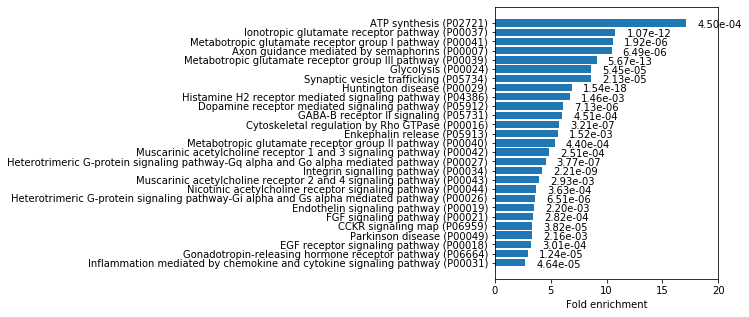

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(4,5))
ax1 = fig.add_subplot(1,1,1)

ax1.barh(range(0, len(fold_list)), fold_list[::-1])
ax1.set_yticks(range(0, len(fold_list)))
ax1.set_yticklabels(label_list[::-1])
for i in range(0, len(fold_list)):
    ax1.annotate('%.2e' % fdr_list[::-1][i], (fold_list[::-1][i],i), (fold_list[::-1][i]+1,i-0.5))
ax1.set_xlim(0, 20)
ax1.set_xlabel('Fold enrichment')
plt.show()